In [126]:
# Test Run

m1 = 25.0
m2 = 25.0
chi1 = 0.5
chi2 = 0.3
alpha_GB = 1.0
alpha_CS = 1.0


flow = 20.0

sample_rate = 4096
delta_t = 1./sample_rate
tlen = 128

tsampleslen = sample_rate * tlen
flen = tsampleslen / 2 + 1

delta_f = 1.0/tlen

In [128]:
#sp, sc = waveform.get_fd_waveform(approximant='IMRPhenomD', mass1=m1, mass2=m2,
#                                  delta_f=delta_f, f_lower=flow, distance = 1.e-1)

sp, sc = waveform.get_fd_waveform(approximant='IMRPhenomD', mass1=m1, mass2=m2,
                                  spin1z = chi1, spin2z = chi2,
                                  delta_f=delta_f, f_lower=flow, distance = 1.e1)

#sp, sc = waveform.get_fd_waveform(approximant='IMRPhenomPv2', mass1=5, mass2=5,
#                                  delta_f=1.0/4, f_lower=40)

sp_array = np.array(sp.data)
sc_array = np.array(sc.data)
freq_sp = np.array(sp.sample_frequencies.data)
freq_sc = np.array(sc.sample_frequencies.data)

(20, 8192.0)

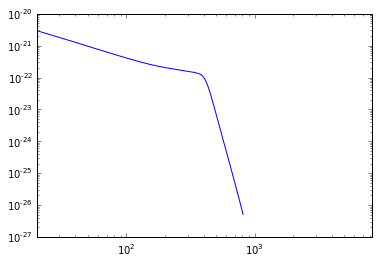

In [129]:
loglog(freq_sp, abs(sp))
xlim(20, 2. / delta_t)

In [108]:
# Scalar-Tensor Theory
#b, beta = ST_to_ppE(m1,m2,chi1,chi2)

# Gauss-Bonnet Theory
#b, beta = GB_to_ppE(m1,m2,chi1,chi2,alpha_GB)
b = 0.0
beta = 0.0
# Chern-Simons Theory
#b, beta = dCS_to_ppE(m1,m2,chi1,chi2,alpha_CS)
tp, tc = IFFT_to_TD(m1, m2, b, beta,
                    freq_sp, freq_sc,
                    sp_array, sc_array,
                    delta_t, delta_f)

(31.95, 32.02)

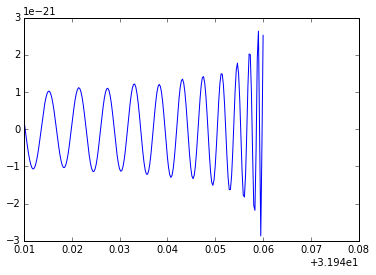

In [130]:
plot(delta_t * np.arange(len(tp)), tp)
xlim(31.95, 32.02)

(0.0, 0.02)

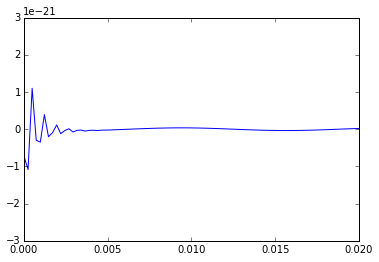

In [131]:
plot(delta_t * np.arange(len(tp)), tp)
xlim(0., 0.02)

In [132]:
noise = np.array(Noise(flow,delta_f,delta_t,tlen))

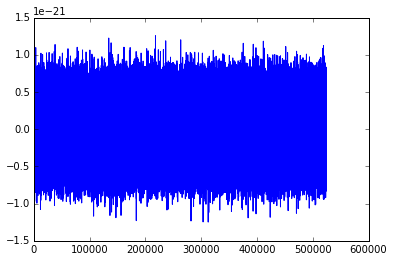

In [133]:
plot(noise)

In [134]:
tp_long, tc_long = Array_Match(tp,tc,noise)

In [135]:
signal = noise + tp_long

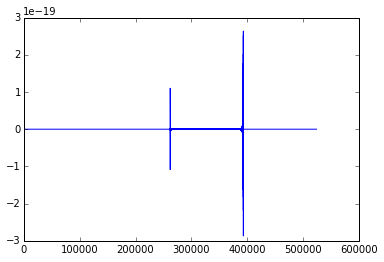

In [97]:
plot(tp_long)

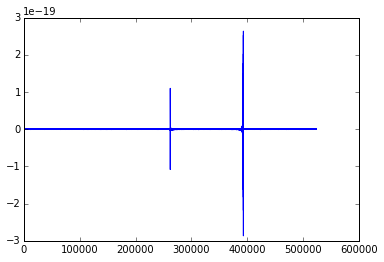

In [98]:
plot(signal)

In [99]:
print len(template_Fseries), len(signal_Tseries), len(p_s_d), 2*(len(p_s_d) - 1)

262145 524288 262145 524288


In [100]:
noise.dtype

dtype('float64')

In [136]:
signal_Tseries = types.TimeSeries(np.real(signal), delta_t=delta_t, dtype = noise.dtype)

In [137]:
template_Fseries = types.FrequencySeries(np.zeros(len(noise)/2 + 1), delta_f=delta_f, dtype = np.complex128)
template_Fseries[:len(sp)] = sp

In [138]:
p_s_d = psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

In [139]:
SNRp = filter.matched_filter(template_Fseries, signal_Tseries,
                             psd=p_s_d,
                             low_frequency_cutoff=flow)

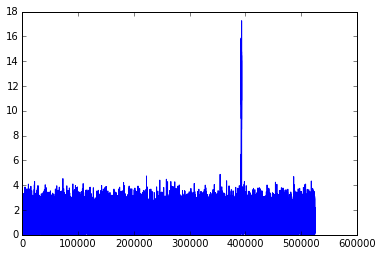

In [140]:
plot(abs(SNRp))

In [56]:
Signal_ON = Matched_Filter(template_Fseries, template_Fseries,
                            signal_Tseries, signal_Tseries,
                            flen, delta_f, flow)

ValueError: For C2C FFT, len(outvec) must be nbatch*size

In [ ]:
flen = len(fp)
Signal_OFF = Matched_Filter(fp,fc,noise_p,noise_c,flen,delta_f,flow)
Signal_ON = Matched_Filter(fp,fc,data_p,data_c,flen,delta_f,flow)


In [ ]:


#Plus_Signal_in_Noise = noise + tp_long
#Cross_Signal_in_Noise = noise + tc_long

fp, fc = FFT_to_FD(tp,tc)
noise_p, noise_c = FFT_to_FD(noise,noise)
fp, fc = Array_Match(fp,fc,noise_p)
data_p = noise_p + fp
data_c = noise_c + fc
#data_p, data_c = FFT_to_FD(Plus_Signal_in_Noise, Cross_Signal_in_Noise)

fp = FrequencySeries(fp,delta_f)
fc = FrequencySeries(fc,delta_f)
noise_p = FrequencySeries(noise_p,delta_f)
noise_c = FrequencySeries(noise_c,delta_f)
data_p = FrequencySeries(data_p,delta_f)
data_c = FrequencySeries(data_c,delta_f)

flen = len(fp)
Signal_OFF = Matched_Filter(fp,fc,noise_p,noise_c,flen,delta_f,flow)
Signal_ON = Matched_Filter(fp,fc,data_p,data_c,flen,delta_f,flow)

#Signal_OFF_p = abs(np.array(Signal_OFF))[0]
#Signal_OFF_c = abs(np.array(Signal_OFF))[1]
#Signal_ON_p = abs(np.array(Signal_ON))[0]
#Signal_ON_c = abs(np.array(Signal_ON))[1]
#---------------------------------------------------------------------------------------------------------

#t_values = np.linspace(0,2048,8388609,endpoint='True')
#pylab.plot(t_values,Signal_OFF)
#pylab.plot(t_values,Signal_ON)
